<a href="https://colab.research.google.com/github/hyjass/jaskarans/blob/main/HANDWRITTEN_DIGIT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROJECT TITLE : HANDWITTEN DIGIT PREDICTION**

### **OBJECTIVE : This model analyzes and predict the outcome of the number fed into the model with various flavors of the handwriting available**

### **DATA SOURCE : load_digits**

### **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **IMPORT DATA**

In [2]:
from sklearn.datasets import load_digits
df=load_digits()


### **DESCRIBE DATA : The datasets. load_digits() function helps to load and return the digit dataset.**

### **DATA VISUALISATION**

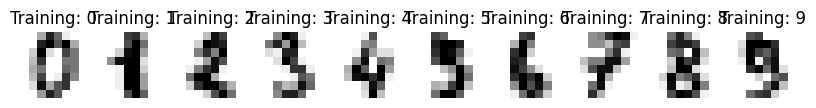

In [3]:
_, axes= plt.subplots(nrows=1,ncols=10,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % label)

### **DATA PREPROCESSING**

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [8]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

### **SCALING IMAGE DATA**

In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data=data/16

In [15]:
data.min()

0.0

In [16]:
data.max()

1.0

In [17]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

### **TRAIN TEST SPLIT DATA**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### **MODELING : RANDOM FOREST MODEL**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### **PREDICT TEST DATA**

In [21]:
y_pred=rf.predict(X_test)

In [22]:
y_pred

array([2, 3, 7, 6, 0, 2, 1, 4, 1, 3, 1, 8, 5, 2, 5, 9, 8, 8, 6, 6, 5, 3,
       3, 6, 1, 7, 7, 1, 6, 2, 6, 1, 9, 1, 4, 3, 9, 5, 5, 9, 2, 5, 4, 6,
       2, 3, 7, 6, 7, 3, 2, 9, 4, 3, 8, 0, 9, 3, 8, 0, 8, 0, 7, 6, 8, 4,
       7, 5, 6, 6, 5, 6, 5, 4, 3, 9, 4, 6, 7, 2, 9, 5, 1, 6, 3, 5, 4, 3,
       3, 9, 3, 7, 6, 0, 9, 0, 4, 6, 0, 9, 5, 2, 6, 9, 2, 5, 3, 7, 2, 6,
       4, 1, 4, 5, 5, 6, 2, 3, 1, 4, 7, 4, 1, 7, 0, 1, 5, 6, 6, 7, 8, 4,
       6, 5, 4, 3, 7, 1, 6, 6, 1, 0, 7, 2, 6, 6, 1, 7, 1, 9, 5, 0, 1, 7,
       0, 5, 9, 6, 4, 3, 2, 7, 3, 8, 9, 8, 1, 3, 2, 3, 9, 9, 5, 3, 1, 9,
       4, 3, 4, 5, 7, 1, 0, 9, 5, 2, 6, 8, 7, 8, 0, 6, 2, 2, 1, 6, 6, 5,
       7, 1, 4, 5, 0, 7, 6, 8, 9, 9, 2, 0, 8, 7, 5, 5, 9, 2, 2, 6, 2, 0,
       4, 1, 9, 2, 4, 8, 9, 7, 4, 5, 9, 4, 7, 4, 7, 1, 4, 0, 1, 9, 4, 5,
       1, 3, 7, 7, 8, 5, 3, 3, 5, 3, 3, 9, 7, 6, 3, 8, 5, 7, 0, 4, 0, 8,
       9, 3, 4, 4, 0, 9, 5, 1, 3, 3, 2, 4, 6, 5, 4, 2, 5, 9, 9, 3, 9, 9,
       1, 7, 3, 5, 4, 7, 9, 4, 2, 6, 9, 5, 7, 2, 1,

### **MODEL ACCURACY**

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)


array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 57,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 63]])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.96      0.98      0.97        52
           2       1.00      0.98      0.99        54
           3       1.00      0.93      0.97        61
           4       1.00      0.93      0.97        61
           5       0.95      0.98      0.96        56
           6       1.00      0.98      0.99        60
           7       0.91      1.00      0.95        49
           8       0.98      0.95      0.96        42
           9       0.94      0.98      0.96        64

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### **EXPLAINATION : The Handwritten Digit Recognition is the ability of the computers to recognize the human handwritten digits. With the help of the dataset, this allows the model to analyze and predict the outcome of the number fed into the model with various flavors of the handwriting available.**